# CSI5155 

# Assignment 2

## Name: Ahmed Haj Abdel Khaleq
## ID: 8223727

In [125]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# importing the dataset 
bank_df = pd.read_csv("bank-additional/bank-additional-full.csv", delimiter =";")

#print(bank_df.y.unique())
#print(bank_df.groupby("y").size())
#bank_df.info()

print(bank_df.groupby('job').size())
# using LabelEncoder on columns with categorical data
labelencoder = LabelEncoder()
#bank_df['job'] = pd.get_dummies(bank_df.job, prefix = "job") #
#bank_df['marital'] = labelencoder.fit_transform(bank_df['marital'])# 
bank_df['education'] = labelencoder.fit_transform(bank_df['education']) 
#bank_df['default'] = labelencoder.fit_transform(bank_df['default']) #
#bank_df['housing'] = labelencoder.fit_transform(bank_df['housing']) #
#bank_df['loan'] = labelencoder.fit_transform(bank_df['loan']) #
bank_df['contact'] = labelencoder.fit_transform(bank_df['contact'])
bank_df['month'] = labelencoder.fit_transform(bank_df['month'])
bank_df['day_of_week'] = labelencoder.fit_transform(bank_df['day_of_week'])
bank_df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

# using OneHotEncoder on columns with nominal data
bank_df = pd.concat([bank_df, pd.get_dummies(bank_df['job'], prefix='job')],axis=1)
bank_df.drop(['job'],axis=1, inplace=True)

bank_df = pd.concat([bank_df, pd.get_dummies(bank_df['marital'], prefix='marital')],axis=1)
bank_df.drop(['marital'],axis=1, inplace=True)

bank_df = pd.concat([bank_df, pd.get_dummies(bank_df['default'], prefix='default')],axis=1)
bank_df.drop(['default'],axis=1, inplace=True)

bank_df = pd.concat([bank_df, pd.get_dummies(bank_df['housing'], prefix='housing')],axis=1)
bank_df.drop(['housing'],axis=1, inplace=True)

bank_df = pd.concat([bank_df, pd.get_dummies(bank_df['loan'], prefix='loan')],axis=1)
bank_df.drop(['loan'],axis=1, inplace=True)

# dropping 'duration' feature
bank_df = bank_df.drop('duration', axis=1)

# Separate the label classes from the dataset, and store them in a separate dataframe
y = bank_df.filter(['y'], axis=1)
y['y'] = labelencoder.fit_transform(y['y'])
X = bank_df.drop('y', axis = 1)



print("Dataset shape: {}\nLabel set shape:{}".format(X.shape, y.shape))
X.head()

#print(X.groupby('job_housemaid').size())



# Balancing step which I will ignore

# poutcome seems to be related to the outcome. Ensuring that there's an even split in the undersampled majority class is key
##bank_pout_nonex = bank_df[bank_df['poutcome'] == 1]
##bank_pout_fail = bank_df[bank_df['poutcome'] == 2]
##bank_pout_sucs = bank_df[bank_df['poutcome'] == 3]

# When exploring the data, I found that there were only 479 instances where poutcome = 'success' and y = 'no'.
# Therefore, poutcome = 'nonexistent' and poutcome = 'failure' had to be increased in order to achieve class balance between y = 'yes and y = 'no'
##bank_nonex_no = bank_pout_nonex[bank_pout_nonex['y'] == 'no'][0:2080]
##bank_fail_no = bank_pout_fail[bank_pout_fail['y'] == 'no'][0:2081]
##bank_sucs_no = bank_pout_sucs[bank_pout_sucs['y'] == 'no']


##undersampled_no = pd.concat([bank_nonex_no,bank_fail_no, bank_sucs_no])
##class_yes = bank_df[bank_df['y'] == 'yes']
##bank_dataset2 = pd.concat([class_yes, undersampled_no])

# show that the dataset is now balanced
##print(bank_dataset2.groupby('y').size())

# show split of poutcome
##print(bank_dataset2.groupby('poutcome').size())


# Separate the label classes from the dataset, and store them in a separate dataframe
##class_label = bank_dataset2.filter(['y'], axis=1)
##class_label['y'] = labelencoder.fit_transform(class_label['y'])

##bank_dataset = bank_dataset2.drop('y', axis=1)


##bank_dataset.head()
##print(bank_dataset.shape)


job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
dtype: int64
Dataset shape: (41188, 39)
Label set shape:(41188, 1)


,age,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,...,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,0,1,6,1,1,999,0,1,1.1,...,0,1,0,0,1,0,0,1,0,0
1,57,3,1,6,1,1,999,0,1,1.1,...,0,0,1,0,1,0,0,1,0,0
2,37,3,1,6,1,1,999,0,1,1.1,...,0,1,0,0,0,0,1,1,0,0
3,40,1,1,6,1,1,999,0,1,1.1,...,0,1,0,0,1,0,0,1,0,0
4,56,3,1,6,1,1,999,0,1,1.1,...,0,1,0,0,1,0,0,0,0,1


# Question 1
## Part 1: Rebalancing using Oversampling, Undersampling, and Balanced sampling

SMOTE implementation source: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

NearMiss implementation source: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.CondensedNearestNeighbour.html#imblearn.under_sampling.CondensedNearestNeighbour



In [126]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours

# Part A: Oversampling using SMOTE
print("Original Dataset shape:")
print(y.groupby('y').size())
print()

sm = SMOTE(random_state=42)
X_ovr, y_ovr = sm.fit_resample(X, y)

print("Oversampled Dataset shape:")
print(y_ovr.groupby('y').size())
print()

# Part B: Undersampling using EditedNearestNeighbours with k = 5
enn = EditedNearestNeighbours(n_neighbors=5)
X_und, y_und = enn.fit_resample(X, y)

print("Undersampled Dataset shape:")
print(y_und.groupby('y').size())
print()

# Part C: Balanced sampling by combining both Oversampling and Undersamping(SMOTE followed by ENN)
# oversample minority to 30%
sm2 = SMOTE(random_state=42, sampling_strategy=0.5) 

# Perform oversampling then undersampling
X_bal, y_bal = sm2.fit_resample(X, y)
X_bal, y_bal = enn.fit_resample(X_bal, y_bal)

print("Balance-sampled Dataset shape:")
print(y_bal.groupby('y').size())

Original Dataset shape:
y
0    36548
1     4640
dtype: int64

Oversampled Dataset shape:
y
0    36548
1    36548
dtype: int64

Undersampled Dataset shape:
y
0    25559
1     4640
dtype: int64

Balance-sampled Dataset shape:
y
0    21791
1    18274
dtype: int64


## Part 2 & 3: Apply six algorithms on the sampled sets

takes a while to run!!!

In [7]:
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, auc

# Removing the extra empty dimension from the labels as identified by sklearn
y_ovr = np.squeeze(y_ovr.to_numpy())
y_und = np.squeeze(y_und.to_numpy())
y_bal = np.squeeze(y_bal.to_numpy())

stats = ['Sample', 'Average Accuracy', 'Avg Macro Precision', 'Avg Macro Recall']

# SVM

# creating our model 
svm_ovr = svm.SVC(kernel="linear")
svm_und = svm.SVC(kernel="linear")
svm_bal = svm.SVC(kernel="linear")



# training our model
print("SVM Model")
print('-' * 40)
print('{:<25s}{:^25s}{:>25s}{:>25s}'.format(stats[0], stats[1], stats[2], stats[3]))
##svm_clf.fit(X_bal, y_bal) 

cv_score = cross_validate(svm_ovr, X_ovr, y_ovr, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Oversampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_score = cross_validate(svm_und, X_und, y_und, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Undersampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_svm_bal = cross_validate(svm_bal, X_bal, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Balance-sampled", sum(cv_svm_bal['test_accuracy'])/10, sum(cv_svm_bal['test_precision_macro'])/10, sum(cv_svm_bal['test_recall_macro']/10)))

# Decision Tree 
# recreating and retraining our model from scratch
tree_ovr = tree.DecisionTreeClassifier()
tree_und = tree.DecisionTreeClassifier()
tree_bal = tree.DecisionTreeClassifier()

stats = ['Sample','Average Accuracy', 'Macro Avg Precision', 'Macro Avg Recall']

print("\n\nDecision Tree")
print('-' * 40)
print('{:<25s}{:^25s}{:>25s}{:>25s}'.format(stats[0], stats[1], stats[2], stats[3]))

#bin_tree.fit(X_bal, y_bal)

cv_score = cross_validate(tree_ovr, X_ovr, y_ovr, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Oversampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_score = cross_validate(tree_und, X_und, y_und, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Undersampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_tree_bal = cross_validate(tree_bal, X_bal, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Balance-sampled",sum(cv_tree_bal['test_accuracy'])/10, sum(cv_tree_bal['test_precision_macro'])/10, sum(cv_tree_bal['test_recall_macro']/10)))

# printing the tree in readable format
#tree_rules = tree.export_text(bin_tree, feature_names=list(X_train))
#print(tree_rules)


# Naive Bayes
nb_ovr = GaussianNB()
nb_und = GaussianNB()
nb_bal = GaussianNB()
print("\n\nNB Learner")
print('-' * 40)
print('{:<25s}{:^25s}{:>25s}{:>25s}'.format(stats[0], stats[1], stats[2], stats[3]))

cv_score = cross_validate(nb_ovr, X_ovr, y_ovr, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Oversampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_score = cross_validate(nb_und, X_und, y_und, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Undersampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_nb_bal = cross_validate(nb_bal, X_bal, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Balance-sampled", sum(cv_nb_bal['test_accuracy'])/10, sum(cv_nb_bal['test_precision_macro'])/10, sum(cv_nb_bal['test_recall_macro']/10)))


# K-NN
# creating our model
knn_ovr = KNeighborsClassifier(n_neighbors=7)
knn_und = KNeighborsClassifier(n_neighbors=7)
knn_bal = KNeighborsClassifier(n_neighbors=7)

# training our model
print("\n\nKNN Model")
print('-' * 40)
print('{:<25s}{:^25s}{:>25s}{:>25s}'.format(stats[0], stats[1], stats[2], stats[3]))

cv_score = cross_validate(knn_ovr, X_ovr, y_ovr, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Oversampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_score = cross_validate(knn_und, X_und, y_und, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Undersampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_knn_bal = cross_validate(knn_bal, X_bal, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Balance-sampled", sum(cv_knn_bal['test_accuracy'])/10, sum(cv_knn_bal['test_precision_macro'])/10, sum(cv_knn_bal['test_recall_macro']/10)))

# Random Forest
# creating our model
rf_ovr = RandomForestClassifier()
rf_und = RandomForestClassifier()
rf_bal = RandomForestClassifier()

# training our model
print("\n\nRandom Forest")
print('-' * 40)
print('{:<25s}{:^25s}{:>25s}{:>25s}'.format(stats[0], stats[1], stats[2], stats[3]))

cv_score = cross_validate(rf_ovr, X_ovr, y_ovr, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Oversampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_score = cross_validate(rf_und, X_und, y_und, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Undersampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_rf_bal = cross_validate(rf_bal, X_bal, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Balance-sampled", sum(cv_rf_bal['test_accuracy'])/10, sum(cv_rf_bal['test_precision_macro'])/10, sum(cv_rf_bal['test_recall_macro']/10)))

# Extra/Extreme Learning Tree
# creating our model
elt_ovr = ExtraTreesClassifier()
elt_und = ExtraTreesClassifier()
elt_bal = ExtraTreesClassifier()

# training our model
print("\n\nExtreme Learning Tree")
print('-' * 40)
print('{:<25s}{:^25s}{:>25s}{:>25s}'.format(stats[0], stats[1], stats[2], stats[3]))

cv_score = cross_validate(elt_ovr, X_ovr, y_ovr, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Oversampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_score = cross_validate(elt_und, X_und, y_und, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Undersampled", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))

cv_elt_bal = cross_validate(elt_bal, X_bal, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Balance-sampled", sum(cv_elt_bal['test_accuracy'])/10, sum(cv_elt_bal['test_precision_macro'])/10, sum(cv_elt_bal['test_recall_macro']/10)))









SVM Model
----------------------------------------
Sample                       Average Accuracy           Avg Macro Precision         Avg Macro Recall
Oversampled                 0.3693568902751877          0.39206109845128834       0.3693536378046368


/Users/Ahmed/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Undersampled                0.8616845190175247           0.7942497245837737       0.6677208994136973
Balance-sampled             0.7793567634572598            0.831477686443353       0.7663319220816289


Decision Tree
----------------------------------------
Sample                       Average Accuracy           Macro Avg Precision         Macro Avg Recall
Oversampled                 0.6469527552467499            0.754749647193712       0.6469523420167318
Undersampled                0.3200063505085891            0.422619228779204       0.3065244086151296
Balance-sampled              0.602018802343029           0.7141999594212536       0.6246805306357106


NB Learner
----------------------------------------
Sample                       Average Accuracy           Macro Avg Precision         Macro Avg Recall
Oversampled                  0.742360687936223           0.7571455572223298         0.74235798034798
Undersampled                0.7660339702853233           0.7120170698703243      

## Part 4: Choose the sampling method that produces the best results

As shown by the tables above, the Balance-sampling method produces the best and most consistent results. While the Oversampling method does seem to have similar performance, by looking at the Macro Precision, and Macro Recall values, we can see that the Balance-sampling method is more robust. In addition, the Undersampling method seems to be performing the least well, this is because the dataset is still unbalanced even after performing ENN undersampling.

The results are consistent with the findings in the paper "A study of the behavior of several methods for balancing machine learning training data" (Batista et al.) where the authors concluded that SMOTE + ENN performs better than SMOTE on its own.

## Part 5: Accuracies Table

Average Accuracies table:

In [61]:
from statistics import stdev
print('-' * 110)
print('{:<5s}{:^15s}{:^15s}{:^15s}{:^15s}{:^15s}{:^15s}'.format('Fold','SVM', 'DT', 'NB', 'K-NN', 'RF', 'ELT'))
print('-' * 110)
for i in range(10):
    print('{:<5}{:^15.4f}{:^15.4f}{:^15.4f}{:^15.4f}{:^15.4f}{:^15.4f}'.format(i+1,cv_svm_bal['test_accuracy'][i], cv_tree_bal['test_accuracy'][i], cv_nb_bal['test_accuracy'][i], cv_knn_bal['test_accuracy'][i], cv_rf_bal['test_accuracy'][i], cv_elt_bal['test_accuracy'][i]))

print('-' * 110)
print('{:<5}{:^15.4f}{:^15.4f}{:^15.4f}{:^15.4f}{:^15.4f}{:^15.4f}'.format('avg',sum(cv_svm_bal['test_accuracy'])/10, sum(cv_tree_bal['test_accuracy'])/10, sum(cv_nb_bal['test_accuracy'])/10, sum(cv_knn_bal['test_accuracy'])/10, sum(cv_rf_bal['test_accuracy'])/10, sum(cv_elt_bal['test_accuracy'])/10))
print('{:<5}{:^15.4f}{:^15.4f}{:^15.4f}{:^15.4f}{:^15.4f}{:^15.4f}'.format('stdev', stdev(cv_svm_bal['test_accuracy']), stdev(cv_tree_bal['test_accuracy']), stdev(cv_nb_bal['test_accuracy']), stdev(cv_knn_bal['test_accuracy']), stdev(cv_rf_bal['test_accuracy']), stdev(cv_elt_bal['test_accuracy'])))



--------------------------------------------------------------------------------------------------------------
Fold       SVM            DT             NB            K-NN            RF             ELT      
--------------------------------------------------------------------------------------------------------------
1        0.5613         0.6831         0.6441         0.8755         0.6748         0.6698     
2        0.8231         0.5495         0.8927         0.9521         0.8565         0.8550     
3        0.8772         0.6217         0.9166         0.9805         0.9516         0.9533     
4        0.8525         0.5336         0.8612         0.8894         0.5470         0.7774     
5        0.8540         0.7390         0.8667         0.8268         0.7999         0.8887     
6        0.8555         0.7069         0.8545         0.8994         0.8837         0.9136     
7        0.8467         0.5567         0.8253         0.7661         0.7551         0.8427     
8        0

Paired t-test:

In [83]:
from scipy import stats

# function finds pairwise difference in each fold for 2 algorithm cv scores (helper for pairt)
def diff(acc_arr1, acc_arr2):
    diff = []
    for i in range(10):
        diff.append(acc_arr1['test_accuracy'][i] - acc_arr2['test_accuracy'][i])
    
    return diff

# function finds pairwise difference for given list of cv scores
def pairt(cv_arr):
    diff_arr = []
    for i in range(len(cv_arr) - 1):
        for j in range(i+1, len(cv_arr)):
            diff_arr.append(diff(cv_arr[i], cv_arr[j]))
    
    return diff_arr

# function finds pvals for a given list of cv scores
def pval(cv_arr):
    pval_arr = []
    for i in range(len(cv_arr) - 1):
        for j in range(i+1, len(cv_arr)):
            pval_arr.append(stats.ttest_rel(cv_arr[i]['test_accuracy'],cv_arr[j]['test_accuracy'])[1])
    
    return pval_arr

# calculate the pairwise difference for the six algorithms in each fold
cv_arr = [cv_svm_bal, cv_tree_bal, cv_nb_bal, cv_knn_bal, cv_rf_bal, cv_elt_bal]
diff_arr = pairt(cv_arr)
pval_arr = pval(cv_arr)


# print table 1 
print("TABLE 1")
print('-' * 110)
print('{:<5s}{:^10s}{:^10s}{:^10s}{:^10s}{:^10s}{:^10s}{:^10s}{:^10s}{:^10s}'.format('Fold','SVM-DT', 'SVM-NB', 'SVM-KNN', 'SVM-RF', 'SVM-ELT', 
                                                        'DT-NB', 'DT-KNN', 'DT-RF', 'DT-ELT'))
print('-' * 110)

for i in range(10):
    print('{:<5}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}'.format(i+1, diff_arr[0][i],diff_arr[1][i], diff_arr[2][i], 
                                                                      diff_arr[3][i], diff_arr[4][i],diff_arr[5][i],
                                                                      diff_arr[6][i], diff_arr[7][i], diff_arr[8][i]))


print('-' * 110)
print('{:<5}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}'.format('avg', sum(diff_arr[0])/10, sum(diff_arr[1])/10,
                                                                                                     sum(diff_arr[2])/10, sum(diff_arr[3])/10,
                                                                                                     sum(diff_arr[4])/10, sum(diff_arr[5])/10,
                                                                                                     sum(diff_arr[6])/10, sum(diff_arr[7])/10, 
                                                                                                     sum(diff_arr[8])/10))

print('{:<5}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}'.format('stdev', stdev(diff_arr[0]), stdev(diff_arr[1]),
                                                                                                     stdev(diff_arr[2]), stdev(diff_arr[3]),
                                                                                                     stdev(diff_arr[4]), stdev(diff_arr[5]),
                                                                                                     stdev(diff_arr[6]), stdev(diff_arr[7]), 
                                                                                                     stdev(diff_arr[8])/10))

print('{:<5}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}'.format('p-val', pval_arr[0], pval_arr[1],
                                                                                                     pval_arr[2], pval_arr[3],
                                                                                                     pval_arr[4], pval_arr[5],
                                                                                                     pval_arr[6], pval_arr[7], 
                                                                                                     pval_arr[8]))




# Table 2
print("\n\nTABLE 2")
print('-' * 110)
print('{:<5s}{:^10s}{:^10s}{:^10s}{:^10s}{:^10s}{:^10s}'.format('Fold','NB-KNN', 'NB-RF', 'NB-ELT', 'KNN-RF', 'KNN-ELT', 
                                                        'RF-ELT'))
print('-' * 110)

for i in range(10):
    print('{:<5}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}'.format(i+1, diff_arr[9][i],diff_arr[10][i], diff_arr[11][i], 
                                                                      diff_arr[12][i], diff_arr[13][i],diff_arr[14][i]))


print('-' * 110)
print('{:<5}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}'.format('avg', sum(diff_arr[9])/10, sum(diff_arr[10])/10,
                                                                            sum(diff_arr[11])/10, sum(diff_arr[12])/10,
                                                                            sum(diff_arr[13])/10, sum(diff_arr[14])/10))

print('{:<5}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}'.format('stdev', stdev(diff_arr[9]), stdev(diff_arr[10]),
                                                                            stdev(diff_arr[11]), stdev(diff_arr[12]),
                                                                            stdev(diff_arr[13]), stdev(diff_arr[14])))

print('{:<5}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}{:^10.4f}'.format('p-val', pval_arr[9], pval_arr[10],
                                                                                                     pval_arr[11], pval_arr[12],
                                                                                                     pval_arr[13], pval_arr[14]))




TABLE 1
--------------------------------------------------------------------------------------------------------------
Fold   SVM-DT    SVM-NB   SVM-KNN    SVM-RF   SVM-ELT    DT-NB     DT-KNN    DT-RF     DT-ELT  
--------------------------------------------------------------------------------------------------------------
1     -0.1218   -0.0829   -0.3142   -0.1136   -0.1086    0.0389   -0.1924    0.0082    0.0132  
2      0.2735   -0.0696   -0.1290   -0.0334   -0.0319   -0.3431   -0.4025   -0.3070   -0.3055  
3      0.2556   -0.0394   -0.1033   -0.0744   -0.0761   -0.2950   -0.3589   -0.3299   -0.3317  
4      0.3189   -0.0087   -0.0369    0.3055    0.0751   -0.3277   -0.3559   -0.0135   -0.2438  
5      0.1150   -0.0127    0.0272    0.0542   -0.0347   -0.1278   -0.0878   -0.0609   -0.1497  
6      0.1485    0.0010   -0.0439   -0.0282   -0.0582   -0.1475   -0.1925   -0.1767   -0.2067  
7      0.2901    0.0215    0.0806    0.0916    0.0040   -0.2686   -0.2094   -0.1985   -0.2861  
8 

## Part 6: Statistical Difference

As shown in the tables above, the algorithm with the highest average accuracy across the 10 folds is K-NN, followed by ELT and SVM, with NB in 4th position.

By looking at the p-values, with 95% confidence rate, there is a significant statistical difference between K-NN and the other algorithms that are not SVM or ELT (P-value less than 0.05 for KNN - algothims besides SVM and ELT, with KNN-NB being close). 

In addition, we can also see a significant statistical difference between DT, our worst performing algorithm, and all of the other 5 algorithms. This is because the p-value for every column that is comparing DT with another algorithm, is less than 0.05, therefore showing that there is a significant statistical difference.


We can be confident that KNN is statistically the best performing algorithm, with ELT, SVM, and NB following closely behind. When it comes to ELT, SVM, and NB, we can see that there is no significant statistical difference between those 3, and that the p-value is actually the highest between those 3, which shows that they have statistically similar performance. 


Therefore, when it comes to selecting the 2 "Best Algorithms", we will have to choose KNN, and any one of ELT, SVM, or NB. Due to significant difference in training speed, I will be choosing KNN and ELT.

## Part 7 & 8: Feature Extraction

Techniques used: 
* VarianceThreshold: if a feature does not change by more than a selected threshold, then it gets removed.
* RFECV: Recursive Feature Elimination and Cross Validation Selection. (selecting the best features using a classifier)

In [90]:
from sklearn.feature_selection import  VarianceThreshold, RFECV

print("{:<25}{:^10}".format("", "Num of Features"))
print("{:<25}{:^10}".format("Before Selection", X_bal.shape[1]))
selector = VarianceThreshold(0.01)
X_bal_new2 = selector.fit_transform(X_bal)
print("{:<25}{:^10}".format("Variance Thresholding", X_bal_new2.shape[1]))
selector2 = RFECV(elt_bal, step=1, cv=3, n_jobs = -1)
X_bal_new3 = selector2.fit_transform(X_bal_new2, y_bal)
print("{:<25}{:^10}".format("VT + RFECV", X_bal_new3.shape[1]))

                         Num of Features
Before Selection             39    
Variance Thresholding        36    
VT + RFECV                   35    


In [97]:
stats = ['Sample', 'Average Accuracy', 'Avg Macro Precision', 'Avg Macro Recall']

# Before Selection Table
print("Before Selection:\n")
print('{:<5s}{:^25s}{:>25s}{:>25s}'.format("Model", stats[1], stats[2], stats[3]))
print('-' * 80)

cv_elt_bal = cross_validate(elt_bal, X_bal, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<5}{:^25}{:>25}{:>25}'.format("ETL", sum(cv_elt_bal['test_accuracy'])/10, sum(cv_elt_bal['test_precision_macro'])/10, sum(cv_elt_bal['test_recall_macro']/10)))

cv_score = cross_validate(knn_bal, X_bal, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<5}{:^25}{:>25}{:>25}'.format("KNN", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))


# After Selection Table
print("\n\nAfter Selection:\n")
print('{:<5s}{:^25s}{:>25s}{:>25s}'.format("Model", stats[1], stats[2], stats[3]))
print('-' * 80)


cv_elt_bal = cross_validate(elt_bal, X_bal_new3, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<5}{:^25}{:>25}{:>25}'.format("ETL", sum(cv_elt_bal['test_accuracy'])/10, sum(cv_elt_bal['test_precision_macro'])/10, sum(cv_elt_bal['test_recall_macro']/10)))

cv_score = cross_validate(knn_bal, X_bal_new3, y_bal, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<5}{:^25}{:>25}{:>25}'.format("KNN", sum(cv_score['test_accuracy'])/10, sum(cv_score['test_precision_macro'])/10, sum(cv_score['test_recall_macro']/10)))





Before Selection:

Model    Average Accuracy           Avg Macro Precision         Avg Macro Recall
--------------------------------------------------------------------------------
ETL     0.7872656014730088           0.8499285505033077       0.7957542642746924
KNN     0.8257482692856148            0.861978455323601        0.836212478434216


After Selection:

Model    Average Accuracy           Avg Macro Precision         Avg Macro Recall
--------------------------------------------------------------------------------
ETL     0.7896613776614839           0.8505286609046211       0.7981028998712315
KNN     0.8260477763514448           0.8621688353051924       0.8364701441690434


In both of our algorithms, we see very minor improvement in their average accuracies. Therefore we can conclude that Feature Selection did not significantly improve the accuracies of our algorithms. 

It is also interesting to note that after exploring different Feature Selection techniques, most of them resulted in the models actually decreasing in Average Accuracy. In addition, onehot encoding was applied to some of the features so that feature selection would improve our algorithms in cases where one value of a feature is more important than another value (e.g. having auburn hair is more important than having white hair for a certain classification). Therefore, I believe that our data is already optimized in terms of Feature Selection.

# Part B: Comparison of algorithms - multiple datasets

Importing datasets and dealing with empty values (using 'most frequent' setting due to presence of categorical data)


DataFrame Imputer Source: https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn

Replacing '?' with NaN Source: https://stackoverflow.com/questions/50894580/how-to-replace-question-mark-in-value-of-a-panda-frame-as-missing-value

In [210]:
from sklearn.impute import SimpleImputer

# importing the datasets 
iris_df = pd.read_csv("iris.data", delimiter =",")
hv_df = pd.read_csv("house-votes-84.data", delimiter=",")
lr_df = pd.read_csv("labor-neg.data", delimiter=",")

y_iris = iris_df.filter(['class'], axis=1)
y_iris['class'] = labelencoder.fit_transform(y_iris['class'])
X_iris = iris_df.drop('class', axis = 1)

#print(hv_df.head())

y_hv = hv_df.filter(['class'], axis=1)
y_hv['class'] = labelencoder.fit_transform(y_hv['class'])
hv_df = hv_df.drop('class', axis = 1)

y_lr = lr_df.filter(['class'], axis=1)
y_lr['class'] = labelencoder.fit_transform(y_lr['class'])
lr_df = lr_df.drop('class', axis = 1)

hv_df.replace({'?':np.nan}, inplace=True)
lr_df.replace({'?':np.nan}, inplace=True)

print("Before dealing with empty values:\n")
print(hv_df.isnull().sum())
print("\n")
print(lr_df.isnull().sum())

print("\n\n")

# dealing with empty values (Cited above)
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


X_hv = DataFrameImputer().fit_transform(hv_df)
X_lr = DataFrameImputer().fit_transform(lr_df)



print("After dealing with empty values:\n")
print(X_hv.isnull().sum())
print("\n")
print(X_lr.isnull().sum())


# Dealing with Categorical Data:
X_hv = X_hv.apply(LabelEncoder().fit_transform)
X_lr = X_lr.apply(LabelEncoder().fit_transform)



# Removing the extra empty dimension from the labels as identified by sklearn
y_iris = np.squeeze(y_iris.to_numpy())
y_hv = np.squeeze(y_hv.to_numpy())
y_lr = np.squeeze(y_lr.to_numpy())


Before dealing with empty values:

handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64


dur                        1
wage1.wage                 1
wage2.wage                10
wage3.wage                28
cola                      16
hours.hrs                  3
pension                   22
stby_pay   

## Applying SVM, K-NN, and RF on the new datasets

In [245]:
stats = ['Sample', 'Average Accuracy', 'Avg Macro Precision', 'Avg Macro Recall']

# SVM
# creating our model 
svm_iris = svm.SVC(kernel="linear")
svm_hv   = svm.SVC(kernel="linear")
svm_lr   = svm.SVC(kernel="linear")

# training our model
print("SVM Model")
print('-' * 40)
print('{:<25s}{:^25s}{:>25s}{:>25s}'.format(stats[0], stats[1], stats[2], stats[3]))
##svm_clf.fit(X_bal, y_bal) 

cv_svm_iris = cross_validate(svm_iris, X_iris, y_iris, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Iris", sum(cv_svm_iris['test_accuracy'])/10, sum(cv_svm_iris['test_precision_macro'])/10, sum(cv_svm_iris['test_recall_macro']/10)))

cv_svm_hv = cross_validate(svm_hv, X_hv, y_hv, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("House Votes", sum(cv_svm_hv['test_accuracy'])/10, sum(cv_svm_hv['test_precision_macro'])/10, sum(cv_svm_hv['test_recall_macro']/10)))

cv_svm_lr = cross_validate(svm_lr, X_lr, y_lr, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Labor Negotiations", sum(cv_svm_lr['test_accuracy'])/10, sum(cv_svm_lr['test_precision_macro'])/10, sum(cv_svm_lr['test_recall_macro']/10)))

print('{:<25}{:^25}{:>25}{:>25}'.format("Bank", sum(cv_svm_bal['test_accuracy'])/10, sum(cv_svm_bal['test_precision_macro'])/10, sum(cv_svm_bal['test_recall_macro']/10)))


# K-NN
# creating our model
knn_iris = KNeighborsClassifier(n_neighbors=7)
knn_hv   = KNeighborsClassifier(n_neighbors=7)
knn_lr   = KNeighborsClassifier(n_neighbors=7)

# training our model
print("\n\nKNN Model")
print('-' * 40)
print('{:<25s}{:^25s}{:>25s}{:>25s}'.format(stats[0], stats[1], stats[2], stats[3]))

cv_knn_iris = cross_validate(knn_iris, X_iris, y_iris, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Iris", sum(cv_knn_iris['test_accuracy'])/10, sum(cv_knn_iris['test_precision_macro'])/10, sum(cv_knn_iris['test_recall_macro']/10)))

cv_knn_hv = cross_validate(knn_hv, X_hv, y_hv, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("House Votes", sum(cv_knn_hv['test_accuracy'])/10, sum(cv_knn_hv['test_precision_macro'])/10, sum(cv_knn_hv['test_recall_macro']/10)))

cv_knn_lr = cross_validate(knn_lr, X_lr, y_lr, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Labor Negotiations", sum(cv_knn_lr['test_accuracy'])/10, sum(cv_knn_lr['test_precision_macro'])/10, sum(cv_knn_lr['test_recall_macro']/10)))

print('{:<25}{:^25}{:>25}{:>25}'.format("Bank", sum(cv_knn_bal['test_accuracy'])/10, sum(cv_knn_bal['test_precision_macro'])/10, sum(cv_knn_bal['test_recall_macro']/10)))

# Random Forest
# creating our model
rf_iris = RandomForestClassifier()
rf_hv   = RandomForestClassifier()
rf_lr   = RandomForestClassifier()

# training our model
print("\n\nRandom Forest")
print('-' * 40)
print('{:<25s}{:^25s}{:>25s}{:>25s}'.format(stats[0], stats[1], stats[2], stats[3]))

cv_rf_iris = cross_validate(rf_iris, X_iris, y_iris, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Iris", sum(cv_rf_iris['test_accuracy'])/10, sum(cv_rf_iris['test_precision_macro'])/10, sum(cv_rf_iris['test_recall_macro']/10)))

cv_rf_hv = cross_validate(rf_hv, X_hv, y_hv, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("House Votes", sum(cv_rf_hv['test_accuracy'])/10, sum(cv_rf_hv['test_precision_macro'])/10, sum(cv_rf_hv['test_recall_macro']/10)))

cv_rf_lr = cross_validate(rf_lr, X_lr, y_lr, cv=10, scoring=["accuracy", "precision_macro", "recall_macro"], n_jobs = -1)
print('{:<25}{:^25}{:>25}{:>25}'.format("Labor Negotiations", sum(cv_rf_lr['test_accuracy'])/10, sum(cv_rf_lr['test_precision_macro'])/10, sum(cv_rf_lr['test_recall_macro']/10)))

print('{:<25}{:^25}{:>25}{:>25}'.format("Bank", sum(cv_rf_bal['test_accuracy'])/10, sum(cv_rf_bal['test_precision_macro'])/10, sum(cv_rf_bal['test_recall_macro']/10)))


# housing results in arrays
cv_svm = [sum(cv_svm_iris['test_accuracy'])/10, sum(cv_svm_hv['test_accuracy'])/10, sum(cv_svm_lr['test_accuracy'])/10,
         sum(cv_svm_bal['test_accuracy'])/10]

cv_knn = [sum(cv_knn_iris['test_accuracy'])/10, sum(cv_knn_hv['test_accuracy'])/10, sum(cv_knn_lr['test_accuracy'])/10,
         sum(cv_knn_bal['test_accuracy'])/10]

cv_rf = [sum(cv_rf_iris['test_accuracy'])/10, sum(cv_rf_hv['test_accuracy'])/10, sum(cv_rf_lr['test_accuracy'])/10,
         sum(cv_rf_bal['test_accuracy'])/10]





SVM Model
----------------------------------------
Sample                       Average Accuracy           Avg Macro Precision         Avg Macro Recall
Iris                        0.9733333333333334           0.9793650793650794       0.9733333333333333
House Votes                 0.9584566596194503           0.9552767335004179       0.9608937699011229
Labor Negotiations                  0.9                  0.9166666666666666       0.9166666666666665
Bank                        0.7793567634572598            0.831477686443353       0.7663319220816289


KNN Model
----------------------------------------
Sample                       Average Accuracy           Avg Macro Precision         Avg Macro Recall
Iris                        0.9666666666666668           0.9738095238095239       0.9666666666666665
House Votes                 0.9308668076109937            0.928499083550571       0.9302397561588737
Labor Negotiations                 0.875                              0.875       0.8666

## Part 2

In [255]:
from scipy.stats import friedmanchisquare

print('-' * 80)
print('{:<20s}{:^10s}{:^10s}{:^10s}'.format('Dataset','SVM', 'K-NN', 'RF'))
print('-' * 80)

rank_array = []
datasets = ["Iris", "House Votes", "Labor Negotiations", "Bank"]

svm_rank = []
knn_rank = []
rf_rank  = []

for i in range(4):
    
    rank_array.append(cv_svm[i])
    rank_array.append(cv_knn[i])
    rank_array.append(cv_rf[i])
    
    rank_array.sort(reverse = True)
    
    svm_rank.append(rank_array.index(cv_svm[i])+1)
    knn_rank.append(rank_array.index(cv_knn[i])+1)
    rf_rank.append(rank_array.index(cv_rf[i])+1)
    print('{:<20s}{:^8.4f}({:^1}){:^8.4f}({:^1}){:^8.4f}({:^1})'.format(datasets[i],cv_svm[i], svm_rank[i], 
                                                                  cv_knn[i], knn_rank[i], 
                                                                  cv_rf[i], rf_rank[i]))
    rank_array = []
    
print('-' * 80)
print('{:<20s}{:^10.2f}{:^10.2f}{:^10.2f}'.format('avg rank',sum(svm_rank)/4, sum(knn_rank)/4, sum(rf_rank)/4))


print("\nFriedman statistic gives {}".format(friedmanchisquare(cv_svm, cv_knn, cv_rf)[0]))

--------------------------------------------------------------------------------
Dataset                SVM       K-NN       RF    
--------------------------------------------------------------------------------
Iris                 0.9733 (1) 0.9667 (2) 0.9533 (3)
House Votes          0.9585 (2) 0.9309 (3) 0.9631 (1)
Labor Negotiations   0.9000 (2) 0.8750 (3) 0.9500 (1)
Bank                 0.7794 (2) 0.8257 (1) 0.7141 (3)
--------------------------------------------------------------------------------
avg rank               1.75      2.25      2.00   

Friedman statistic gives 0.5


By looking at the Friedman table, we can see that given k=3 and n=4, with 5% confidence, gives us a critical value of 6.5. 

Since 0.5 < 6.5, we can come to the conclusion that there is no statistically significant difference between the accuracies of the 3 algorithms, therefore all of our algorithms perform the same in terms of statistical difference.

1.6572468701736927
critical difference = 1.6572468701736927


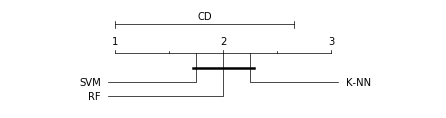

In [266]:
import Orange 
import matplotlib.pyplot as plt

names = ["SVM", "K-NN", "RF"]
avranks = [sum(svm_rank)/4,sum(knn_rank)/4,sum(rf_rank)/4]
cd = Orange.evaluation.compute_CD(avranks, 4 ,alpha="0.05", test="nemenyi")
print(cd)
print("critical difference =",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
plt.show();

The Nemenyi Diagram backs up our conclusion. All of our algorithms are closer to each other than the critical difference, meaning there is no statistically significant difference between them. If our algorithms were further away from each other than the size of the critical difference, then there would be a statistically significant difference in their performance. 

Name: Ahmed Haj Abdel Khaleq 

Student Number: 8223727